In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33


In [3]:
size_price_data = df[["Area", "Price"]]
size_price_data

,Area,Price
0,63,1850000000
1,60,1850000000
2,79,550000000
3,95,902500000
4,123,7000000000
...,...,...
3469,86,3500000000
3470,83,6800000000
3471,75,365000000
3472,105,5600000000


In [4]:
size_price_data.describe()

,Area,Price
count,3474.000000,3.474000e+03
mean,106.772596,5.355095e+09
std,69.355675,8.102939e+09
min,30.000000,3.600000e+06
25%,69.000000,1.415625e+09
50%,90.000000,2.885850e+09
75%,120.000000,6.000000e+09
max,929.000000,9.240000e+10


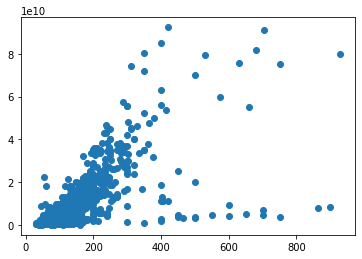

In [5]:
plt.scatter(size_price_data['Area'], size_price_data['Price'])

$$ \text{Hypothesis: } h_\theta(x) = \theta_0 + \theta_1 x $$
$$ \text{Cost Function: } J(\theta_0, \theta_1) = \frac{1}{2m} \sum(\hat{y_i} - y_i)^2 $$

In [6]:
X = size_price_data['Area']
Y = size_price_data['Price'].to_numpy()
X = np.c_[np.ones(size_price_data.shape[0]), X / (np.max(X) - np.min(X))]

In [7]:
X

array([[1.        , 0.07007786],
       [1.        , 0.06674082],
       [1.        , 0.08787542],
       ...,
       [1.        , 0.08342603],
       [1.        , 0.11679644],
       [1.        , 0.09121246]])

In [8]:
iterations = 1500
alpha = 0.01

In [9]:
def compute_cost(X, Y, theta):
    m = len(Y)
    J = (1/(2*m)) * sum((np.matmul(X, theta) - Y)**2)
    return J

In [10]:
def gradient_descent(X, Y, theta, alpha, n_iterations):
    m = len(Y)
    J_history = []
    
    for kk in range(n_iterations):
        tmp_0 = theta[0] - alpha * (1/m) * sum(np.matmul(X, theta) - Y)
        tmp_1 = theta[1] - alpha * (1/m) * sum(np.multiply(np.matmul(X, theta) - Y, X[: ,1]))
        theta[0] = tmp_0
        theta[1] = tmp_1
        J_history.append(compute_cost(X, Y, theta))
        
    return J_history, theta

In [16]:
costs, theta = gradient_descent(X, Y, [0, 0], alpha, iterations)

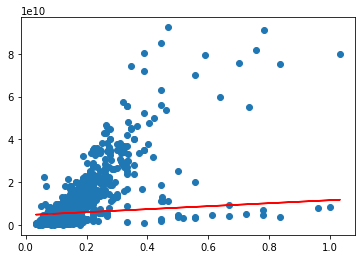

In [17]:
plt.scatter(X[:, 1], Y)
plt.plot(X[:,1],np.matmul(X,theta), c='r')
plt.show()